In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
import numpy as np
#import cv2 as cv
import tensorflow as tf
from concurrent.futures import ThreadPoolExecutor

In [2]:
import pathlib

#path=str(pathlib.Path().resolve())+"\\Dataset"
path = "/kaggle/input/deepfake-and-real-images/Dataset"

In [3]:
tf.test.is_gpu_available()

True

In [4]:
def get_from_dir(dir):
    global path
    dir = os.path.join(path,dir)
    return tf.keras.utils.image_dataset_from_directory(
           dir,
           labels='inferred',
           color_mode="rgb",
           seed=42,
           batch_size=32,
           image_size=(128, 128))

train = get_from_dir("Train")
test = get_from_dir("Test")
val = get_from_dir("Validation")

Found 140002 files belonging to 2 classes.
Found 10905 files belonging to 2 classes.
Found 39428 files belonging to 2 classes.


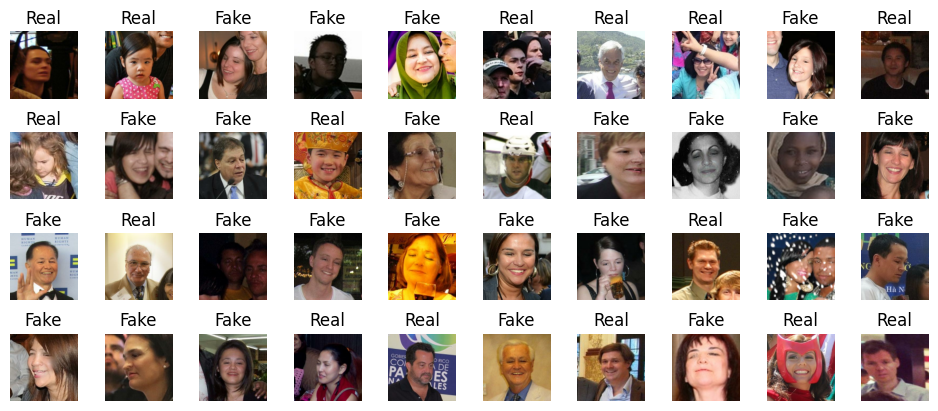

In [5]:
from matplotlib import pyplot as plt

class_names = np.unique(train.class_names)

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
data = list(train.take(n_rows*n_cols))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        
        single_image = data[index][0][0]  
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(single_image.numpy().astype("uint8"),cmap="gray")  
        plt.axis('off')
      
        label_index = data[index][1][0]
        plt.title(class_names[label_index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [6]:
model = models.Sequential()


model.add(layers.Conv2D(32,(3,3),activation="relu", padding='same',input_shape=(128,128,3)))
model.add(layers.Conv2D(32,(3,3),activation="relu", padding='same'))
model.add(layers.MaxPooling2D((2,2), strides=(2, 2)))


model.add(layers.Conv2D(64,(3,3),activation="relu", padding='same'))
model.add(layers.Conv2D(64,(3,3),activation="relu", padding='same'))
model.add(layers.MaxPooling2D((2,2), strides=(2, 2)))


model.add(layers.Conv2D(128,(3,3),activation="relu", padding='same'))
model.add(layers.Conv2D(128,(3,3),activation="relu", padding='same'))
model.add(layers.MaxPooling2D((2,2), strides=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,514,721 (17.22 MB)

 Trainable params: 4,514,721 (17.22 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile('adam',loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [9]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)


history = model.fit(train,epochs=20,batch_size=32,validation_data=val,callbacks=[early_stopping_cb])

Epoch 1/20


I0000 00:00:1727542046.980189     108 service.cc:145] XLA service 0x7ab370004620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727542046.980258     108 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727542046.980264     108 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   5/4376 ━━━━━━━━━━━━━━━━━━━━ 2:34 35ms/step - accuracy: 0.4261 - loss: 21.5949

I0000 00:00:1727542056.184085     108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4376/4376 ━━━━━━━━━━━━━━━━━━━━ 269s 59ms/step - accuracy: 0.8153 - loss: 0.5331 - val_accuracy: 0.8663 - val_loss: 0.3331
Epoch 2/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 167s 38ms/step - accuracy: 0.9243 - loss: 0.1863 - val_accuracy: 0.9085 - val_loss: 0.2258
Epoch 3/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 166s 38ms/step - accuracy: 0.9402 - loss: 0.1498 - val_accuracy: 0.9340 - val_loss: 0.1675
Epoch 4/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 165s 38ms/step - accuracy: 0.9511 - loss: 0.1250 - val_accuracy: 0.9219 - val_loss: 0.1855
Epoch 5/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 165s 38ms/step - accuracy: 0.9564 - loss: 0.1097 - val_accuracy: 0.9099 - val_loss: 0.2757
Epoch 6/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 165s 38ms/step - accuracy: 0.9593 - loss: 0.1012 - val_accuracy: 0.9389 - val_loss: 0.1431
Epoch 7/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 166s 38ms/step - accuracy: 0.9636 - loss: 0.0926 - val_accuracy: 0.9442 - val_loss: 0.1438
Epoch 8/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 165s 38ms/step - accuracy: 0.9670 - lo

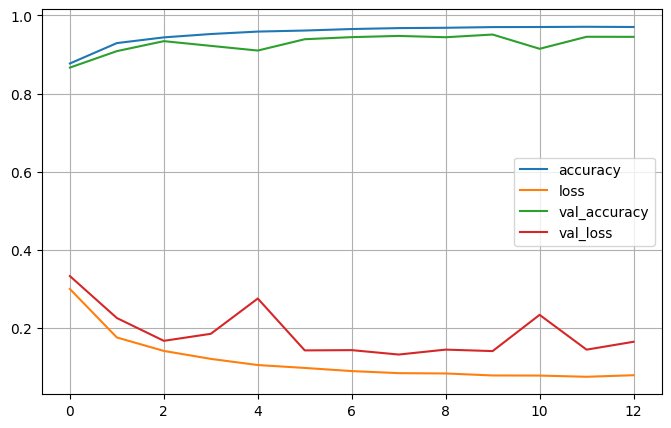

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [11]:
model.evaluate(test)

341/341 ━━━━━━━━━━━━━━━━━━━━ 25s 74ms/step - accuracy: 0.9289 - loss: 0.1792


[0.18386104702949524, 0.9296652674674988]

In [12]:
model.save("modelo_detector_caras.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

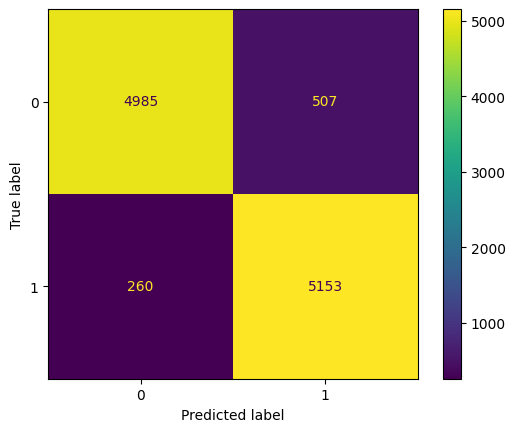

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


true_labels = []
predictions = []

for images, labels in test:
    true_labels.extend(labels.numpy())
    batch_predictions = model.predict(images) >= 0.5
    predictions.extend(batch_predictions.astype(int).flatten())

true_labels = np.array(true_labels)
predictions = np.array(predictions)

cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()